In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

%matplotlib inline

In [2]:
x=np.arange(0,10) # create a numpy array containing the numbers 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
print('x:',x)
y=x[4:8]  # put the 4-indexed (4) through 7-indexed (7) elements in y
print('y:',y)
print('last element:', x[-1])
print('all of x:',x[:])

x: [0 1 2 3 4 5 6 7 8 9]
y: [4 5 6 7]
last element: 9
all of x: [0 1 2 3 4 5 6 7 8 9]


In [3]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}

### Load a file from the 201812 hindcast

In [7]:
f=nc.Dataset('/results/SalishSea/nowcast-green.201812/01apr15/SalishSea_1h_20150401_20150401_ptrc_T.nc')

In [8]:
f2=nc.Dataset('/results/SalishSea/nowcast-green.201812/01may15/SalishSea_1h_20150501_20150501_ptrc_T.nc')

In [25]:
f3=nc.Dataset('/results/SalishSea/nowcast-green.201812/01jun15/SalishSea_1h_20150601_20150601_ptrc_T.nc')

In [26]:
f4=nc.Dataset('/results/SalishSea/nowcast-green.201812/01jul15/SalishSea_1h_20150701_20150701_ptrc_T.nc')

In [27]:
print(f.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'])


In [28]:
fe3t=nc.Dataset('/results/SalishSea/nowcast-green.201812/01apr15/SalishSea_1h_20150401_20150401_carp_T.nc')

In [29]:
fe3t_2=nc.Dataset('/results/SalishSea/nowcast-green.201812/01may15/SalishSea_1h_20150501_20150501_carp_T.nc')

In [30]:
fe3t_3=nc.Dataset('/results/SalishSea/nowcast-green.201812/01jun15/SalishSea_1h_20150601_20150601_carp_T.nc')

In [31]:
fe3t_4=nc.Dataset('/results/SalishSea/nowcast-green.201812/01jul15/SalishSea_1h_20150701_20150701_carp_T.nc')

In [12]:
print(fe3t.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'PAR', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'sigma_theta', 'e3t', 'dissolved_inorganic_carbon', 'total_alkalinity', 'dissolved_oxygen'])


In [13]:
# return times as datetime objects:
torig=dt.datetime.strptime(f.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
print(torig)
times=np.array([torig + dt.timedelta(seconds=ii) for ii in f.variables['time_centered'][:]])

1900-01-01 00:00:00


In [14]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


### Depth Profile

Text(0.5, 0, 'Concentration ($\\mu$M)')

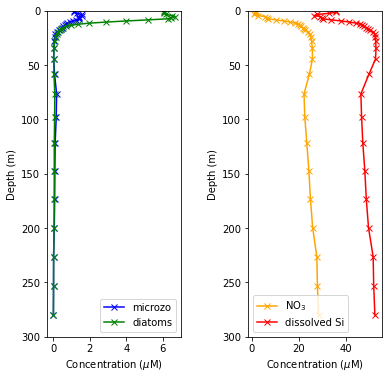

In [15]:
fig,ax=plt.subplots(1,2,figsize=(6,6))
fig.subplots_adjust(wspace=.5) # space the axes out more
il=12 # hour
# use location 'S3':
ij,ii=places.PLACES['S3']['NEMO grid ji']
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['microzooplankton'][il,:,ij,ii]),f.variables['deptht'][:],'b-x',label='microzo')
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['diatoms'][il,:,ij,ii]),f.variables['deptht'][:],'g-x',label='diatoms')
ax[0].set_ylim(300,0)
ax[0].legend()
ax[0].set_xlabel('Concentration ($\mu$M)')
ax[0].set_ylabel('Depth (m)')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['nitrate'][il,:,ij,ii]),f.variables['deptht'][:],'-x',color='orange',label='NO$_3$')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['silicon'][il,:,ij,ii]),f.variables['deptht'][:],'-x',color='r',label='dissolved Si')
ax[1].set_ylim(300,0)
ax[1].set_ylabel('Depth (m)')
ax[1].legend()
ax[1].set_xlabel('Concentration ($\mu$M)')

### Surface, Integrated plots - Aerial view

<ipython-input-21-51074e3861d0>:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')


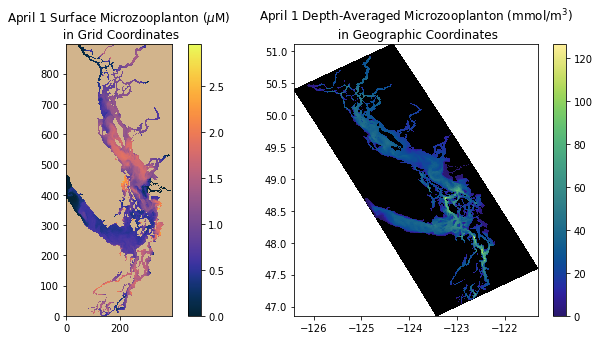

In [21]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=5
fig,ax=plt.subplots(1,2,figsize=(12,5))
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),cmap=cmap0)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('April 1 Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
fig.colorbar(m0,ax=ax[0])
# vertical sum of microzo in mmol/m3 * vertical grid thickness in m:
intuz=np.sum(f.variables['microzooplankton'][il,:,:,:]*fe3t.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz=intuz/np.sum(fe3t.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')
viz_tools.set_aspect(ax[0],coords='map')
ax[1].set_title('April 1 Depth-Averaged Microzooplanton (mmol/m$^3$) \n in Geographic Coordinates');
fig.colorbar(m1,ax=ax[1])

<ipython-input-18-fbed0ad9ec9f>:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')


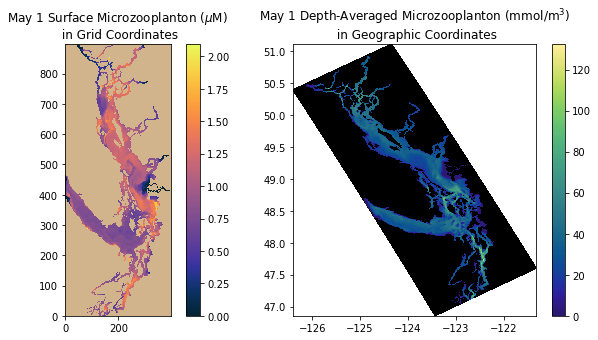

In [18]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=5
fig,ax=plt.subplots(1,2,figsize=(12,5))
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f2.variables['microzooplankton'][il,0,:,:]),cmap=cmap0)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('May 1 Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
fig.colorbar(m0,ax=ax[0])
# vertical sum of microzo in mmol/m3 * vertical grid thickness in m:
intuz=np.sum(f2.variables['microzooplankton'][il,:,:,:]*fe3t_2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz=intuz/np.sum(fe3t_2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')
viz_tools.set_aspect(ax[0],coords='map')
ax[1].set_title('May 1 Depth-Averaged Microzooplanton (mmol/m$^3$) \n in Geographic Coordinates');
fig.colorbar(m1,ax=ax[1])

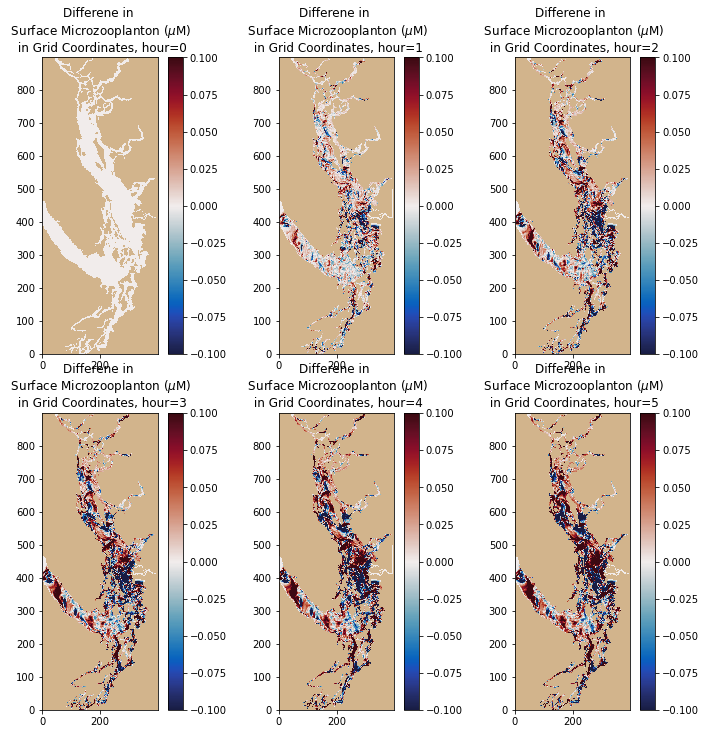

In [19]:
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')
il=5
fig,ax=plt.subplots(2,3,figsize=(12,12))
ax=ax.flatten()
for ii,il in enumerate(range(0,6)):
    m0=ax[ii].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,
                    f.variables['microzooplankton'][il,0,:,:]-f.variables['microzooplankton'][0,0,:,:]),cmap=cmap0,
                        vmin=-.1,vmax=.1)
    viz_tools.set_aspect(ax[ii],coords='grid')
    ax[ii].set_title('Differene in \n Surface Microzooplanton ($\mu$M) \n in Grid Coordinates, hour='+str(il))
    fig.colorbar(m0,ax=ax[ii])

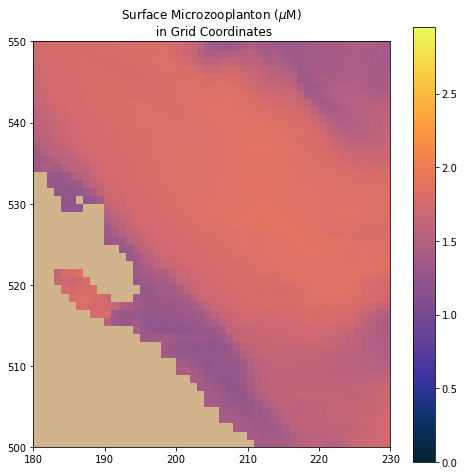

In [20]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap1=cmocean.cm.haline
il=5
fig,ax=plt.subplots(1,1,figsize=(8,8))
m0=ax.pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),cmap=cmap0)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
ax.set_ylim(500,550)
ax.set_xlim(180,230)
fig.colorbar(m0)

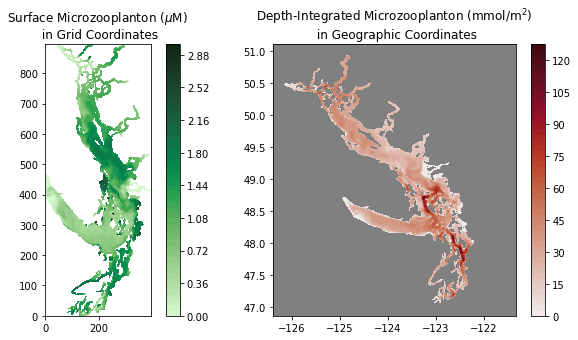

In [17]:
# with contourf: smoothing, but creates a smaller file
cmap0=cmocean.cm.algae
cmap1=cmocean.cm.amp
cmap1.set_bad('k') # does nothing here
il=5
fig,ax=plt.subplots(1,2,figsize=(12,5))
m0=ax[0].contourf(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),levels=50,cmap=cmap0)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
fig.colorbar(m0,ax=ax[0])
# vertical sum of microzo in mmol/m3 * vertical grid thickness in m:
intuz=np.sum(f.variables['microzooplankton'][il,:,:,:]*fe3t.variables['e3t'][il,:,:,:],0)
m1=ax[1].contourf(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,levels=50)
viz_tools.set_aspect(ax[0],coords='map')
ax[1].set_title('Depth-Integrated Microzooplanton (mmol/m$^2$) \n in Geographic Coordinates');
ax[1].set_facecolor('gray')
fig.colorbar(m1,ax=ax[1])

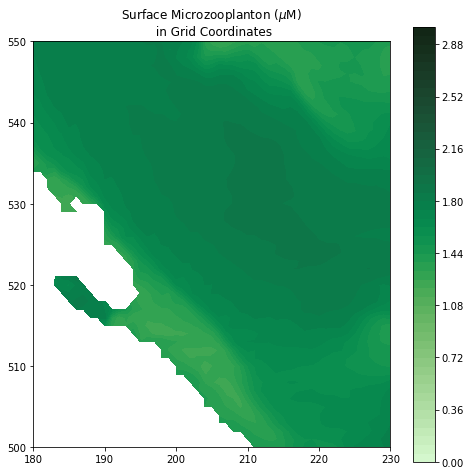

In [18]:
# with contourf: smoothing, but creates a smaller file
il=5
fig,ax=plt.subplots(1,1,figsize=(8,8))
m0=ax.contourf(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),levels=50,cmap=cmap0)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
ax.set_ylim(500,550)
ax.set_xlim(180,230)
fig.colorbar(m0)

### Thalweg plot
  method using contour_thalweg from visualisations.py in tools repo

In [19]:
#open bathy file and meshmask
fbathy=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fmesh=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

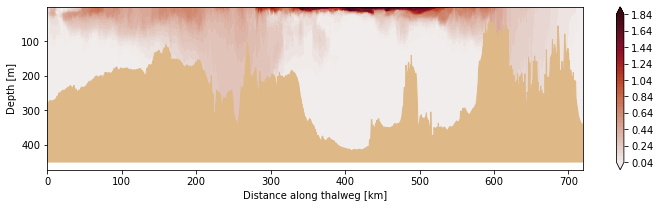

In [20]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
cb=visualisations.contour_thalweg(ax,f.variables['microzooplankton'][il,...],fbathy,fmesh,clevels=50,cmap=cmocean.cm.amp)

In [21]:
fbathy.close()
fmesh.close()

In [22]:
f.close()
fe3t.close()

In [23]:
f2.close()